Example data generated and saved as CSV files.
Accuracy: 0.4
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.38      0.33         8
           1       0.50      0.42      0.45        12

    accuracy                           0.40        20
   macro avg       0.40      0.40      0.39        20
weighted avg       0.42      0.40      0.41        20



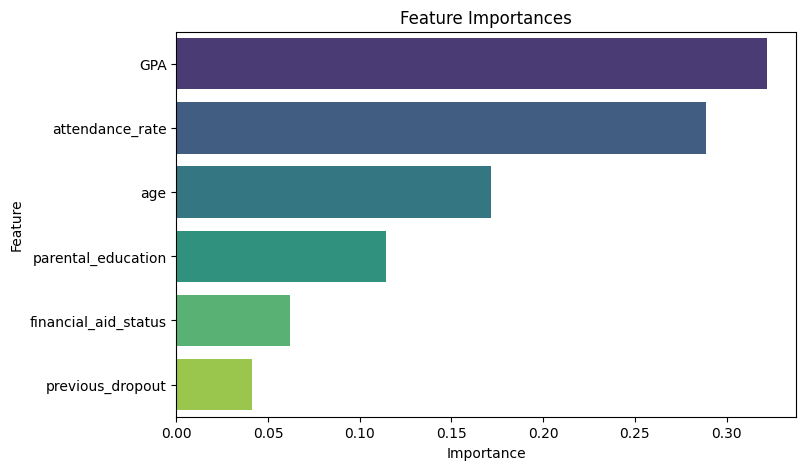

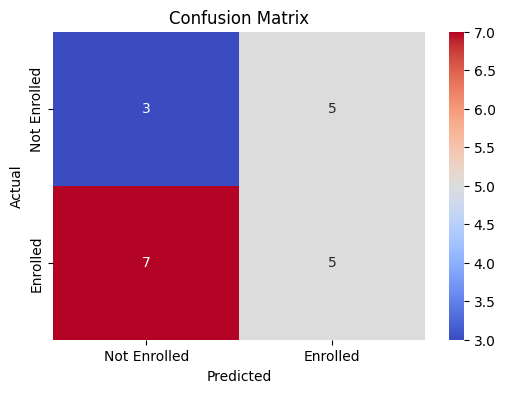

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt


def create_example_data():
    enrollment_data = pd.DataFrame({
        'student_id': range(1, 101),
        'previous_programs_enrolled': np.random.randint(0, 4, 100),
        'previous_dropout': np.random.choice([0, 1], size=100, p=[0.8, 0.2]),
        'enrollment_status': np.random.choice([0, 1], size=100, p=[0.5, 0.5])
    })
    academic_records = pd.DataFrame({
        'student_id': range(1, 101),
        'GPA': np.round(np.random.uniform(2.0, 4.0, 100), 2),
        'attendance_rate': np.random.randint(60, 100, 100)
    })
    demographic_data = pd.DataFrame({
        'student_id': range(1, 101),
        'age': np.random.randint(18, 25, 100),
        'parental_education': np.random.choice(['High School', 'Bachelor', 'Master'], 100),
        'financial_aid_status': np.random.choice(['Yes', 'No'], 100)
    })
    enrollment_data.to_csv('enrollment_data.csv', index=False)
    academic_records.to_csv('academic_records.csv', index=False)
    demographic_data.to_csv('demographic_data.csv', index=False)
    print("Example data generated and saved as CSV files.")


def load_data():
    try:
        enrollment_data = pd.read_csv('enrollment_data.csv')
        academic_records = pd.read_csv('academic_records.csv')
        demographic_data = pd.read_csv('demographic_data.csv')
    except FileNotFoundError:
        uploaded = files.upload()
        enrollment_data = pd.read_csv('enrollment_data.csv')
        academic_records = pd.read_csv('academic_records.csv')
        demographic_data = pd.read_csv('demographic_data.csv')
    return enrollment_data, academic_records, demographic_data

def process_and_train_model(enrollment_data, academic_records, demographic_data):

    data = pd.merge(enrollment_data, academic_records, on='student_id')
    data = pd.merge(data, demographic_data, on='student_id')
    data = data.drop(columns=['student_id'])


    data['parental_education'] = LabelEncoder().fit_transform(data['parental_education'])
    data['financial_aid_status'] = LabelEncoder().fit_transform(data['financial_aid_status'])


    X = data[['GPA', 'attendance_rate', 'age', 'parental_education', 'financial_aid_status', 'previous_dropout']]
    y = data['enrollment_status']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=feature_importances, hue='Feature', palette='viridis', legend=False)
    plt.title('Feature Importances')
    plt.show()


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Not Enrolled', 'Enrolled'], yticklabels=['Not Enrolled', 'Enrolled'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

create_example_data()
enrollment_data, academic_records, demographic_data = load_data()
process_and_train_model(enrollment_data, academic_records, demographic_data)
